In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "Dataset/processed_file.csv"
df = pd.read_csv(file_path)

# Selecting relevant features
X = df[['brand']].copy()

# Encoding categorical variables
X = pd.get_dummies(X, columns=['brand'])

# Adding binary encoded columns for notable effects and skin type
notable_effects_columns = [col for col in df.columns if col.startswith('notable_effects_')]
skin_type_columns = ['Sensitive', 'Combination', 'Oily', 'Dry', 'Normal']
X[notable_effects_columns + skin_type_columns] = df[notable_effects_columns + skin_type_columns]

# Scaling numerical features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encoding product_type
y = LabelEncoder().fit_transform(df['product_type'].astype(str))

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.47      0.54        40
           1       0.41      0.41      0.41        41
           2       0.63      0.66      0.65        79
           3       0.90      0.83      0.86        42
           4       0.37      0.45      0.40        40

    accuracy                           0.58       242
   macro avg       0.59      0.57      0.57       242
weighted avg       0.60      0.58      0.59       242



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Load dataset
file_path = "Dataset/processed_file.csv"
df = pd.read_csv(file_path)

# Selecting relevant features
X = df[['brand']].copy()

# Encoding categorical variables
X = pd.get_dummies(X, columns=['brand'])

# Adding binary encoded columns for notable effects and skin type
notable_effects_columns = [col for col in df.columns if col.startswith('notable_effects_')]
skin_type_columns = ['Sensitive', 'Combination', 'Oily', 'Dry', 'Normal']
X[notable_effects_columns + skin_type_columns] = df[notable_effects_columns + skin_type_columns]

# Scaling numerical features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Extracting product type labels
product_type_columns = [col for col in df.columns if col.startswith('product_type_')]
y = df[product_type_columns].values.argmax(axis=1)  # Convert one-hot encoding to single labels

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training XGBoost Classifier

xgb_classifier.fit(X_train, y_train)

# Making predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))






XGBoost Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.55      0.64        40
           1       0.47      0.44      0.46        41
           2       0.58      0.63      0.61        79
           3       0.85      0.83      0.84        42
           4       0.44      0.53      0.48        40

    accuracy                           0.60       242
   macro avg       0.62      0.60      0.60       242
weighted avg       0.62      0.60      0.61       242



SVM Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.45      0.55        40
           1       0.46      0.41      0.44        41
           2       0.59      0.73      0.65        79
           3       0.85      0.81      0.83        42
           4       0.46      0.47      0.47        40

    accuracy                           0.60       242
   macro avg       0.62      0.58      0.59       242
weighted avg       0.61      0.60      0.60       242



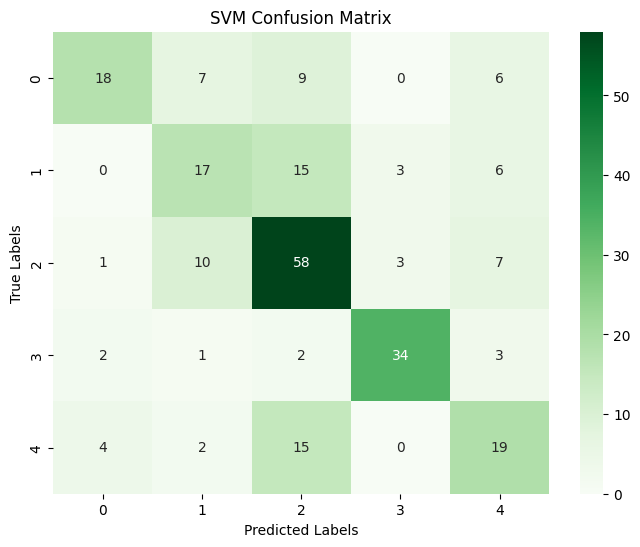

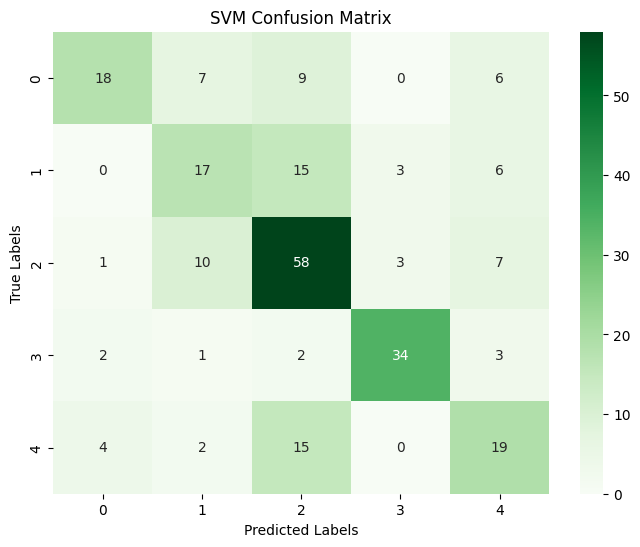

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Ensure confusion_matrix is imported
from sklearn.svm import SVC

# Load dataset
file_path = "Dataset/processed_file.csv"
df = pd.read_csv(file_path)

# Selecting relevant features
X = df[['brand']].copy()

# Encoding categorical variables
X = pd.get_dummies(X, columns=['brand'])

# Adding binary encoded columns for notable effects and skin type
notable_effects_columns = [col for col in df.columns if col.startswith('notable_effects_')]
skin_type_columns = ['Sensitive', 'Combination', 'Oily', 'Dry', 'Normal']
X[notable_effects_columns + skin_type_columns] = df[notable_effects_columns + skin_type_columns]

# Scaling numerical features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Extracting product type labels
product_type_columns = [col for col in df.columns if col.startswith('product_type_')]
y = df[product_type_columns].values.argmax(axis=1)  # Convert one-hot encoding to single labels

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training SVM Classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  # Try 'linear' or 'poly' for different results
svm_classifier.fit(X_train, y_train)

# Making predictions
y_pred = svm_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute and display confusion matrix
def plot_svm_confusion_matrix(y_true, y_pred):
    """Plots a confusion matrix for an SVM model using Seaborn."""
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', 
                xticklabels=sorted(set(y_true)), 
                yticklabels=sorted(set(y_true)))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('SVM Confusion Matrix')
    plt.show()

# Plot the confusion matrix
plot_svm_confusion_matrix(y_test, y_pred)


# Plot the confusion matrix
plot_svm_confusion_matrix(y_test, y_pred)


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "Dataset/processed_file.csv"
df = pd.read_csv(file_path)

# Selecting relevant features
X = df[['brand']].copy()

# Encoding categorical variables
X = pd.get_dummies(X, columns=['brand'])

# Adding binary encoded columns for notable effects and skin type
notable_effects_columns = [col for col in df.columns if col.startswith('notable_effects_')]
skin_type_columns = ['Sensitive', 'Combination', 'Oily', 'Dry', 'Normal']
X[notable_effects_columns + skin_type_columns] = df[notable_effects_columns + skin_type_columns]

# Scaling numerical features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encoding product_type
y = LabelEncoder().fit_transform(df['product_type'].astype(str))

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.47      0.54        40
           1       0.41      0.41      0.41        41
           2       0.63      0.66      0.65        79
           3       0.90      0.83      0.86        42
           4       0.37      0.45      0.40        40

    accuracy                           0.58       242
   macro avg       0.59      0.57      0.57       242
weighted avg       0.60      0.58      0.59       242



 ## Comparision

 Both CatBoost and SVM algorithms performed similarly on the dataset, with CatBoost achieving a slightly better accuracy of 61% compared to SVM's 60%. 


 #### Classification Report Analysis

 | Class Label | CatBoost Precision | SVM Precision | CatBoost Recall | SVM Recall | Key Observation |
|------------|-------------------|-------------|--------------|------------|----------------|
| **0** | 0.71 | 0.72 | 0.50 | 0.45 | CatBoost has better recall, meaning it captures more relevant samples. |
| **1** | 0.45 | 0.46 | 0.37 | 0.41 | Both models struggle to classify this category accurately. |
| **2** | 0.61 | 0.59 | 0.76 | 0.73 | CatBoost shows slightly better precision and recall; meaning it captures more actual positives across classes. |
| **3** | 0.85 | 0.85 | 0.79 | 0.81 | Both models perform equally well for this category. |
| **4** | 0.44 | 0.46 | 0.47 | 0.47 | Very similar performance, showing a challenge in classifying this category. |

CatBoost Confusion Matrix

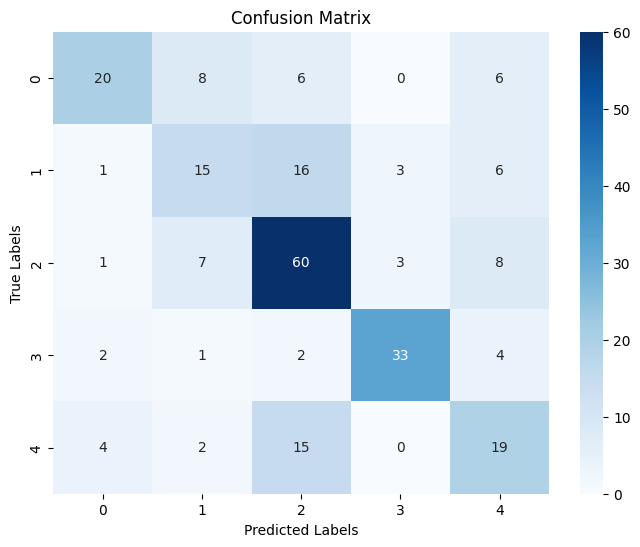

SVM Confusion Matrix

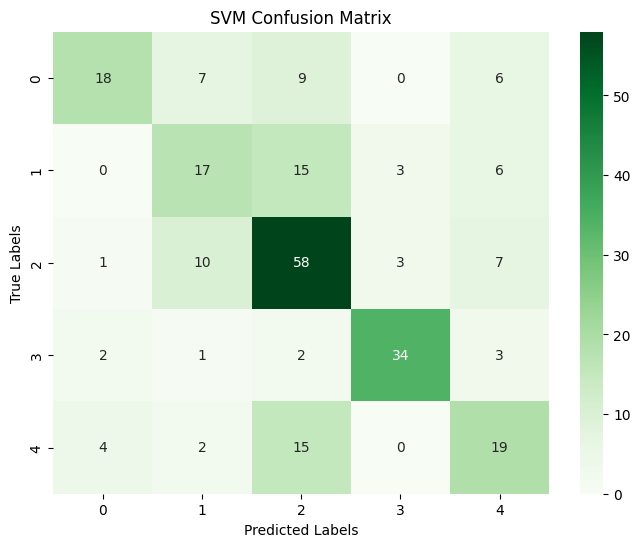
    
##  Which Model Performed Best?  

After comparing **CatBoost** and **SVM**, we **chose CatBoost** as the better model because:  

### ✅ **Why CatBoost Wins?**  
✔ **Higher accuracy** – CatBoost achieved **61%**, slightly outperforming SVM (60%).  
✔ **Better recall** – It identified more correct cases in most classes, making it more reliable.  
✔ **Handles categorical data efficiently** – CatBoost processes categorical variables **natively**, unlike SVM, which requires extra encoding.  
✔ **Prevents overfitting** – Built-in **early stopping** ensures it stops training when performance stops improving.  
  
